# Pymaceuticals Inc.
---

### Analysis
* Your analysis here ...

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_data_df = pd.merge(study_results, mouse_metadata, how = "left", on = "Mouse ID")

In [147]:
#print(mouse_metadata.head())

In [148]:
#print(study_results.head())

In [3]:
mouse_study_data_df
mod_mouse_study_data_df = mouse_study_data_df.loc[(mouse_study_data_df["Timepoint"] == 0), :]
#print(len(mouse_study_data_df))
mod_mouse_study_data_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [1]:
# Display the data table for preview


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [4]:
#print(len(mod_mouse_study_data_df["Mouse ID"]))
#mod_mouse_study_data_df["Mouse ID"].value_counts()
#test01 = mod_mouse_study_data_df[]
#test01 = mod_mouse_study_data_df.loc[(mod_mouse_study_data_df["Mouse ID"] == "g989"), :]
#test02 = mod_mouse_study_data_df.duplicated(keep = False)
#test02.iloc[0:50]
#test02.iloc[50:100]
#test02.iloc[100:150]
#test02.iloc[150:200]
#test02.iloc[200:250]
#mod_mouse_study_data_df

print(len(mouse_metadata["Mouse ID"]))

249


In [2]:
# Checking the number of mice.


249

In [5]:
mod_mouse_study_data_df["Mouse ID"].value_counts()

dup_mouse_id = mod_mouse_study_data_df.loc[(mod_mouse_study_data_df["Mouse ID"] == "g989"), :]
dup_mouse_id["Mouse ID"].unique()


array(['g989'], dtype=object)

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 


array(['g989'], dtype=object)

In [6]:
dup_mouse_study_data_df = mouse_study_data_df.loc[(mouse_study_data_df["Mouse ID"] == "g989"), :]
dup_mouse_study_data_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [7]:
dup_drop_mouse_study_data_df = mod_mouse_study_data_df.loc[(mod_mouse_study_data_df["Mouse ID"] != "g989"), :]
clean_mouse_data_df = dup_drop_mouse_study_data_df
clean_mouse_data_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [8]:
print(len(clean_mouse_data_df["Mouse ID"]))

248


In [6]:
# Checking the number of mice in the clean DataFrame.


248

## Summary Statistics

In [9]:
#mod_clean_mouse_data_df = clean_mouse_data_df.set_index("Drug Regimen").groupby("Drug Regimen")
#mod_clean_mouse_data_df.head()
#mod_clean_mouse_data_df = mod_clean_mouse_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"]
#mod_clean_mouse_data_df.head()

mouse_study_data_df_copy = mouse_study_data_df.copy()
drug_name = mouse_study_data_df_copy.set_index("Drug Regimen").groupby("Drug Regimen")

mean_tumor_vol = mouse_study_data_df_copy.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean().astype(float)

med_tumor_vol = mouse_study_data_df_copy.groupby("Drug Regimen")["Tumor Volume (mm3)"].median().astype(float)

var_tumor_vol = mouse_study_data_df_copy.groupby("Drug Regimen")["Tumor Volume (mm3)"].var().astype(float)

stddev_tumor_vol = mouse_study_data_df_copy.groupby("Drug Regimen")["Tumor Volume (mm3)"].std().astype(float)

stderr_tumor_vol = mouse_study_data_df_copy.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem().astype(float)

mouse_study_summary = pd.DataFrame({"Mean Tumor Volume": mean_tumor_vol,
                                    "Median Tumor Volume": med_tumor_vol,
                                    "Tumor Volume Variance": var_tumor_vol,
                                    "Tumor Volume Std. Dev.": stddev_tumor_vol,
                                    "Tumor Volume Std. Err.": stderr_tumor_vol})

mouse_study_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
#agg_mouse_study_summary = mouse_study_data_df_copy.agg((Capomulin = ("Tumor Volume (mm3)", "mean"),
#                                                        Ceftamin = ("Tumor Volume (mm3)", "median")))

agg_mouse_study_summary = mouse_study_data_df_copy.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"]) 
agg_mouse_study_summary

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line



Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0, 0.5, 'Number of Unique Mice Tested')

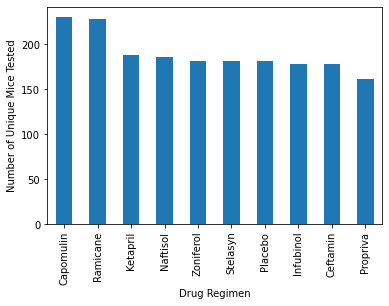

In [13]:
#pd.plot(kind = "bar", x = mouse_study_data_df["Drug Regimen"], y = mouse_study_data_df["Mouse ID"])
#drugReg = mouse_study_data_df["Drug Regimen"]
#ax = drugReg.plot.bar(x="Drug Regimen")
mouse_pandas_bar = mouse_study_data_df["Drug Regimen"].value_counts().plot(kind = "bar")
mouse_pandas_bar.set_xlabel("Drug Regimen")
mouse_pandas_bar.set_ylabel("Number of Unique Mice Tested")

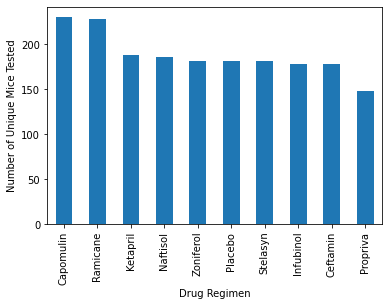

In [19]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.


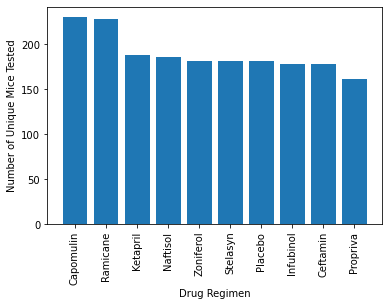

In [14]:
total_drugs_arr = mouse_study_data_df["Drug Regimen"].value_counts().to_dict()

plt.bar(total_drugs_arr.keys(), total_drugs_arr.values(), align = "center")
plt.xticks(rotation = "vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Unique Mice Tested")
plt.show()

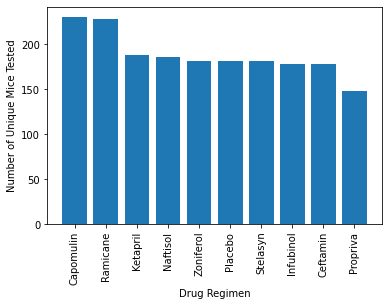

In [20]:
# Generate a bar plot showing the total number of unqiue mice tested on each drug regimen using using pyplot.


Text(0, 0.5, 'Sex')

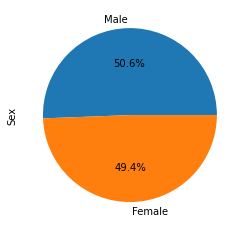

In [15]:
#mouse_pandas_pie = clean_mouse_data_df["Sex"].value_counts().plot(kind = "pie", autopct = "%1.1f%%")
#mouse_pandas_pie.set_ylabel("Sex")

mouse_pandas_pie = mouse_study_data_df["Sex"].value_counts().plot(kind = "pie", autopct = "%1.1f%%")
mouse_pandas_pie.set_ylabel("Sex")

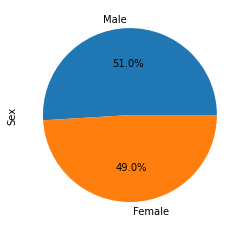

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas


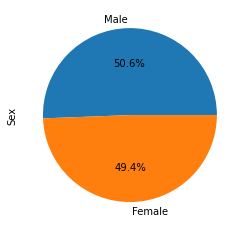

In [16]:
total_gender = mouse_study_data_df["Sex"].value_counts().to_dict()

plt.pie(total_gender.values(), labels = total_gender.keys(), autopct = "%1.1f%%")
plt.ylabel("Sex")
plt.show()

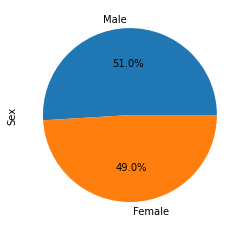

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot


## Quartiles, Outliers and Boxplots

In [166]:
# Used to check mouse data for individual mouse based on Mouse ID
mouse_study_data_df_copy_copy = mouse_study_data_df.copy()
mouse_check = mouse_study_data_df_copy_copy.loc[(mouse_study_data_df_copy_copy["Mouse ID"] == "a366"), :]
mouse_check

id_mouse_df = mouse_study_data_df_copy_copy.groupby("Mouse ID")["Mouse ID"].unique()
timepoint_mouse_df = mouse_study_data_df_copy_copy.groupby("Mouse ID")["Timepoint"].max()

greatest_timepoint_mouse_df = pd.DataFrame({"Timepoint": timepoint_mouse_df})
greatest_timepoint_mouse_df.reset_index()

merged_mouse_df = pd.merge(greatest_timepoint_mouse_df, mouse_study_data_df, how = "left", on = ["Mouse ID", "Timepoint"])
merged_mouse_df


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
244,z435,10,48.710661,0,Propriva,Female,12,26
245,z578,45,30.638696,0,Ramicane,Male,11,16
246,z581,45,62.754451,3,Infubinol,Female,24,25
247,z795,45,65.741070,3,Naftisol,Female,13,29


In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    # add subset 
    
    # Determine outliers using upper and lower bounds

In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    # add subset 
    
    # Determine outliers using upper and lower bounds
    

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


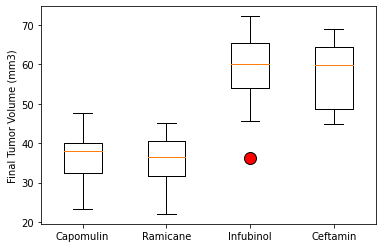

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

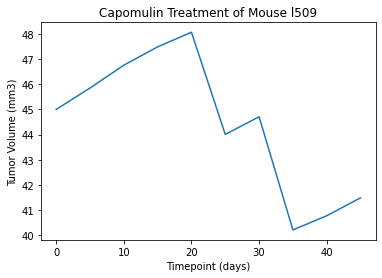

In [33]:
capomulin_drug_df = mouse_study_data_df.loc[(mouse_study_data_df["Drug Regimen"] == "Capomulin"), :]
mouse_l509 = capomulin_drug_df.loc[(capomulin_drug_df["Mouse ID"] == "l509"), :]

mouse_l509_timepoint = mouse_l509["Timepoint"]
mouse_l509_tumor_vol = mouse_l509["Tumor Volume (mm3)"]

plt.plot(mouse_l509_timepoint, mouse_l509_tumor_vol)
plt.title("Capomulin Treatment of Mouse l509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()


In [32]:
#capomulin_drug_df = mouse_study_data_df.loc[(mouse_study_data_df["Drug Regimen"] == "Capomulin"), :]
#mouse_j246 = capomulin_drug_df.loc[(capomulin_drug_df["Mouse ID"] == "j246"), :]

#mouse_j246_timepoint = mouse_j246["Timepoint"]
#mouse_j246_tumor_vol = mouse_j246["Tumor Volume (mm3)"]

#plt.plot(mouse_j246_timepoint, mouse_j246_tumor_vol)
#plt.title("Capomulin Treatment of Mouse j246")
#plt.xlabel("Timepoint (days)")
#plt.ylabel("Tumor Volume (mm3)")
#plt.show()


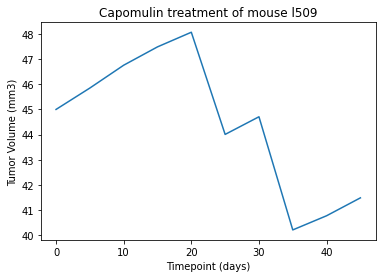

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


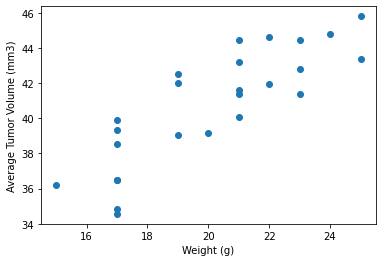

In [48]:
mouse_weight = capomulin_drug_df.groupby("Mouse ID")["Weight (g)"].mean()
avg_tumor_vol = capomulin_drug_df.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
mouse_weight
avg_tumor_vol

plt.scatter(mouse_weight, avg_tumor_vol)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

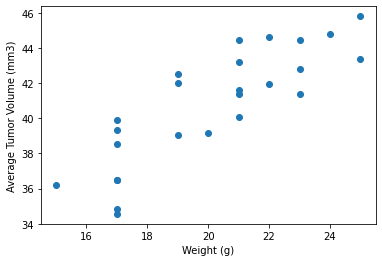

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

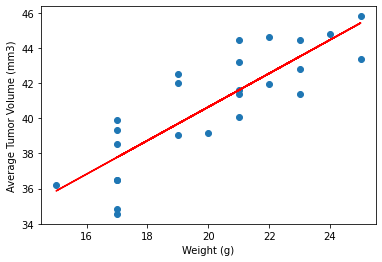

The correlation between mouse weight and the average tumor volume is 0.84.


In [56]:
mouse_weight = capomulin_drug_df.groupby("Mouse ID")["Weight (g)"].mean()
avg_tumor_vol = capomulin_drug_df.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
mouse_weight
avg_tumor_vol

plt.scatter(mouse_weight, avg_tumor_vol)
(slope, intercept, rvalue, pvalue, stderr) = linregress(mouse_weight, avg_tumor_vol)
line_regression_val = (mouse_weight * slope) + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.plot(mouse_weight, line_regression_val, "r-")
#plt.annotate(line_eq, (0, 50), fontsize = 15, color = "red")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

print(f"The correlation between mouse weight and the average tumor volume is {rvalue:,.2f}.")

The correlation between mouse weight and the average tumor volume is 0.84


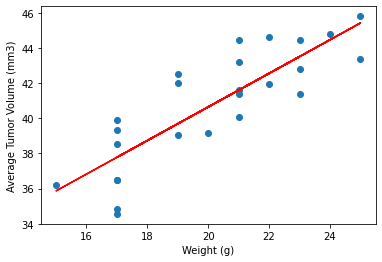

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
